In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c855edde80052ce44ca1257ce5d728c


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sivaki
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | sosnovo-ozerskoye
Processing Record 4 of Set 1 | harrisonburg
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | caravelas
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port hedland
Processing Record 10 of Set 1 | pochutla
Processing Record 11 of Set 1 | amderma
City not found. Skipping...
Processing Record 12 of Set 1 | padang
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | fryanovo
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | karpogory
Processing Record 20 of Set 1 | itarema
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | severo

Processing Record 41 of Set 4 | berdyuzhye
City not found. Skipping...
Processing Record 42 of Set 4 | ntcheu
Processing Record 43 of Set 4 | karratha
Processing Record 44 of Set 4 | la asuncion
Processing Record 45 of Set 4 | ulladulla
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | sechura
Processing Record 48 of Set 4 | eirunepe
Processing Record 49 of Set 4 | wana
Processing Record 50 of Set 4 | estelle
Processing Record 1 of Set 5 | bambous virieux
Processing Record 2 of Set 5 | rock sound
Processing Record 3 of Set 5 | mentok
City not found. Skipping...
Processing Record 4 of Set 5 | chumikan
Processing Record 5 of Set 5 | forth
Processing Record 6 of Set 5 | tambul
City not found. Skipping...
Processing Record 7 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 8 of Set 5 | antofagasta
Processing Record 9 of Set 5 | show low
Processing Record 10 of Set 5 | dunedin
Processing Record 11 of Set 5 | roma
Processing Record 12 of Set 5 | g

Processing Record 26 of Set 8 | kerch
Processing Record 27 of Set 8 | pangody
Processing Record 28 of Set 8 | calama
Processing Record 29 of Set 8 | hihifo
City not found. Skipping...
Processing Record 30 of Set 8 | birao
Processing Record 31 of Set 8 | vallenar
Processing Record 32 of Set 8 | oistins
Processing Record 33 of Set 8 | portland
Processing Record 34 of Set 8 | beringovskiy
Processing Record 35 of Set 8 | port lincoln
Processing Record 36 of Set 8 | dudinka
Processing Record 37 of Set 8 | nalut
Processing Record 38 of Set 8 | hami
Processing Record 39 of Set 8 | khatanga
Processing Record 40 of Set 8 | eureka
Processing Record 41 of Set 8 | santa rosalia
Processing Record 42 of Set 8 | utete
Processing Record 43 of Set 8 | makakilo city
Processing Record 44 of Set 8 | iracoubo
Processing Record 45 of Set 8 | burica
City not found. Skipping...
Processing Record 46 of Set 8 | provideniya
Processing Record 47 of Set 8 | talas
Processing Record 48 of Set 8 | lyubim
Processing R

Processing Record 14 of Set 12 | haines junction
Processing Record 15 of Set 12 | tevaitoa
Processing Record 16 of Set 12 | konstantinovka
Processing Record 17 of Set 12 | tidore
City not found. Skipping...
Processing Record 18 of Set 12 | raudeberg
Processing Record 19 of Set 12 | pingliang
Processing Record 20 of Set 12 | eyl
Processing Record 21 of Set 12 | nemuro
Processing Record 22 of Set 12 | sijunjung
Processing Record 23 of Set 12 | tiznit
Processing Record 24 of Set 12 | nguiu
City not found. Skipping...
Processing Record 25 of Set 12 | hofn
Processing Record 26 of Set 12 | ranong
Processing Record 27 of Set 12 | monforte de lemos
Processing Record 28 of Set 12 | blagodarnyy
Processing Record 29 of Set 12 | tasiilaq
Processing Record 30 of Set 12 | alice town
Processing Record 31 of Set 12 | dawson creek
Processing Record 32 of Set 12 | belmonte
Processing Record 33 of Set 12 | yunyang
Processing Record 34 of Set 12 | grand baie
Processing Record 35 of Set 12 | turukhansk
Pro

In [8]:
len(city_data)

553

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sivaki,52.63,126.75,58.32,35,0,11.79,RU,2020-05-08 01:34:23
1,Mataura,-46.19,168.86,52.88,75,98,3.44,NZ,2020-05-08 01:34:23
2,Sosnovo-Ozerskoye,52.52,111.54,48.36,49,50,12.64,RU,2020-05-08 01:34:24
3,Harrisonburg,38.45,-78.87,55.00,40,1,4.70,US,2020-05-08 01:34:24
4,Hermanus,-34.42,19.23,55.00,95,12,7.47,ZA,2020-05-08 01:30:03
5,Port Alfred,-33.59,26.89,61.00,91,92,7.02,ZA,2020-05-08 01:34:24
6,Caravelas,-17.71,-39.25,73.11,91,100,13.80,BR,2020-05-08 01:34:24
7,Ushuaia,-54.80,-68.30,48.20,76,90,8.05,AR,2020-05-08 01:32:44
8,Port Hedland,-20.32,118.57,86.00,28,29,12.75,AU,2020-05-08 01:31:03
9,Pochutla,15.74,-96.47,86.00,63,44,3.51,MX,2020-05-08 01:34:25


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [11]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sivaki,RU,2020-05-08 01:34:23,52.63,126.75,58.32,35,0,11.79
1,Mataura,NZ,2020-05-08 01:34:23,-46.19,168.86,52.88,75,98,3.44
2,Sosnovo-Ozerskoye,RU,2020-05-08 01:34:24,52.52,111.54,48.36,49,50,12.64
3,Harrisonburg,US,2020-05-08 01:34:24,38.45,-78.87,55.00,40,1,4.70
4,Hermanus,ZA,2020-05-08 01:30:03,-34.42,19.23,55.00,95,12,7.47
5,Port Alfred,ZA,2020-05-08 01:34:24,-33.59,26.89,61.00,91,92,7.02
6,Caravelas,BR,2020-05-08 01:34:24,-17.71,-39.25,73.11,91,100,13.80
7,Ushuaia,AR,2020-05-08 01:32:44,-54.80,-68.30,48.20,76,90,8.05
8,Port Hedland,AU,2020-05-08 01:31:03,-20.32,118.57,86.00,28,29,12.75
9,Pochutla,MX,2020-05-08 01:34:25,15.74,-96.47,86.00,63,44,3.51


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sivaki,RU,2020-05-08 01:34:23,52.63,126.75,58.32,35,0,11.79
1,Mataura,NZ,2020-05-08 01:34:23,-46.19,168.86,52.88,75,98,3.44
2,Sosnovo-Ozerskoye,RU,2020-05-08 01:34:24,52.52,111.54,48.36,49,50,12.64
3,Harrisonburg,US,2020-05-08 01:34:24,38.45,-78.87,55.00,40,1,4.70
4,Hermanus,ZA,2020-05-08 01:30:03,-34.42,19.23,55.00,95,12,7.47
5,Port Alfred,ZA,2020-05-08 01:34:24,-33.59,26.89,61.00,91,92,7.02
6,Caravelas,BR,2020-05-08 01:34:24,-17.71,-39.25,73.11,91,100,13.80
7,Ushuaia,AR,2020-05-08 01:32:44,-54.80,-68.30,48.20,76,90,8.05
8,Port Hedland,AU,2020-05-08 01:31:03,-20.32,118.57,86.00,28,29,12.75
9,Pochutla,MX,2020-05-08 01:34:25,15.74,-96.47,86.00,63,44,3.51


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

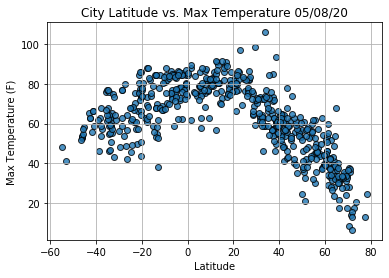

In [18]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

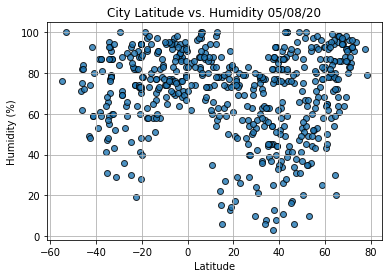

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

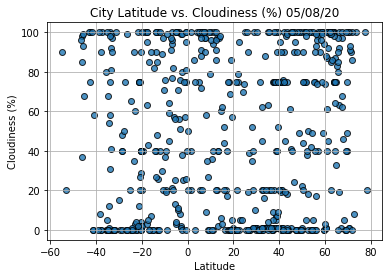

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

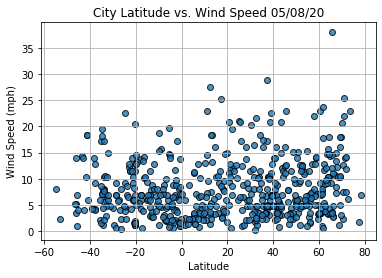

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()